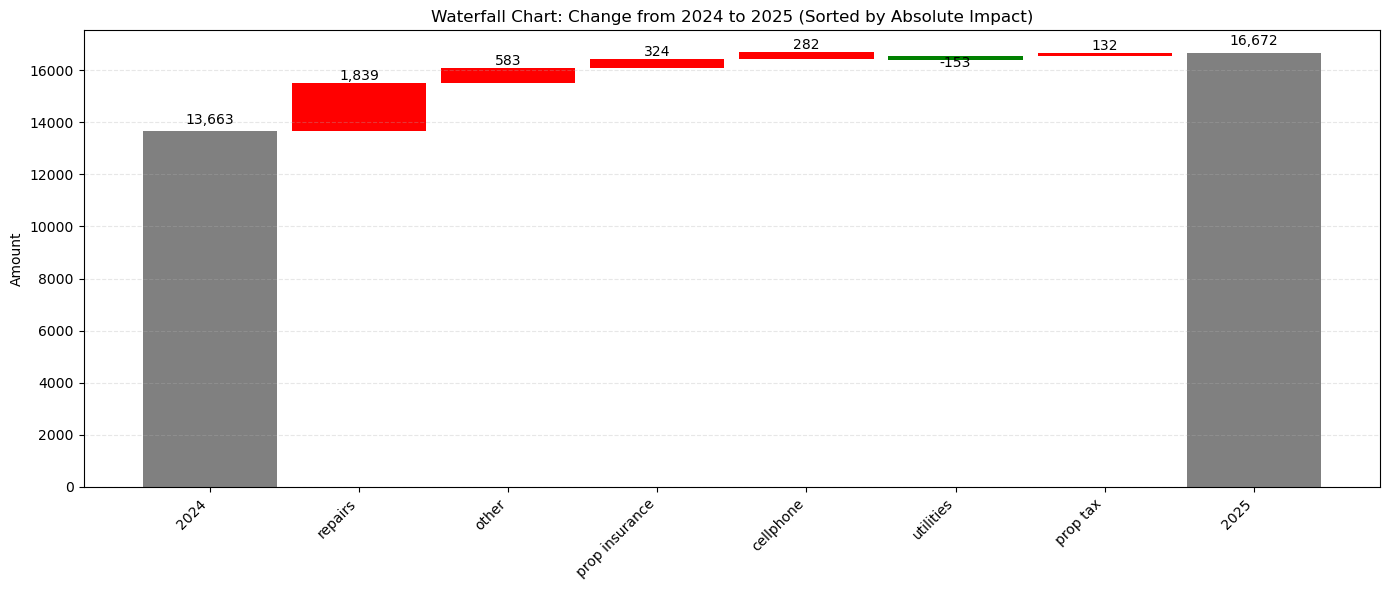

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("data.csv", header=None, names=["label", "value"])

start_label = str(df.iloc[0]["label"])
end_label   = str(df.iloc[-1]["label"])
start_value = df.iloc[0]["value"]
end_value   = df.iloc[-1]["value"]

# Sort contributors by absolute value 
components = df.iloc[1:-1].copy()
components = components.reindex(components["value"].abs().sort_values(ascending=False).index)

# Compute cumulative positions
cumulative = [start_value]
for v in components["value"]:
    cumulative.append(cumulative[-1] + v)
cumulative.append(end_value)

labels = [start_label] + components["label"].tolist() + [end_label]
values = [start_value] + components["value"].tolist() + [end_value]

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.9

for i, (label, val) in enumerate(zip(labels, values)):

    if i == 0 or i == len(values) - 1:
        bottom = 0
        height = val
        color = "gray"
    else:
        prev = cumulative[i-1]
        height = val

        if val > 0:
            bottom = prev
            color = "red"
        else:
            bottom = prev + val
            color = "green"

    ax.bar(i, height, bottom=bottom, width=bar_width, color=color)

    # Add Data labels rounded
    rounded = f"{val:,.0f}"

    if i == 0 or i == len(values) - 1:
        ax.text(i, height + (0.01 * abs(height)), rounded,
                ha='center', va='bottom', fontsize=10)
    else:
        if val > 0:
            ax.text(i, bottom + height + (0.01 * abs(height)), rounded,
                    ha='center', va='bottom', fontsize=10)
        else:
            ax.text(i, bottom - (0.02 * abs(height)), rounded,
                    ha='center', va='top', fontsize=10)

# Format Plots
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_title(f"Waterfall Chart: Change from {start_label} to {end_label} (Sorted by Absolute Impact)")

ax.set_ylabel("Amount")
ax.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
